Putting the necessary libraries to work 

In [ ]:
!pip install pandas_ml

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix

**Load data**

In [13]:
data = pd.read_csv("/content/data_test_set.csv", index_col=0)
#data = pd.read_csv("/content/ai_reg_test.csv", index_col=0)
data  = data.fillna(0)

Calculate rule

In [11]:
def calculate_ACWR_rule(x):
  rule_exp = 0.0
  if x >= 0.80 & x <= 1.30: rule_exp = 0.0
  if x >= 0.70 & x < 0.80: rule_exp = 3.0
  if x > 1.30 & x <= 1.40: rule_exp = 3.0
  if x >= 0.50 & x < 0.70: rule_exp = 7.0
  if x > 1.40 & x <= 1.60: rule_exp = 7.0
  if x > 1.60: rule_exp = 10.0
  if x < 0.50: rule_exp = 10.0

  return rule_exp


In [ ]:
data['RULE_ACWR'] = calculate_ACWR_rule(data['REG_ACWR'])

# Model effectiveness based on aggregation of **MAX** values. 

In [14]:
y = data['Injury']


In [15]:
y_pred = data['CALCULATE_MAX_N']
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Injury'], colnames=['Prediction'], margins = False)

In [16]:
#cf_matrix = confusion_matrix(y, y_pred,labels=[1,0])
print(confusion_matrix)

Prediction    0    1
Injury              
0           103  237
1             6   25


In [17]:
print(metrics.classification_report(y, y_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.10      0.81      0.17        31
           0       0.94      0.30      0.46       340

    accuracy                           0.35       371
   macro avg       0.52      0.55      0.31       371
weighted avg       0.87      0.35      0.43       371



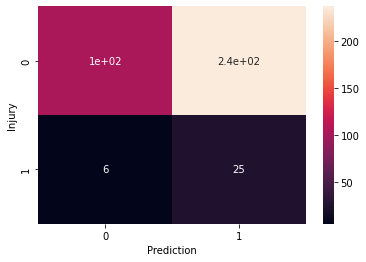

In [18]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

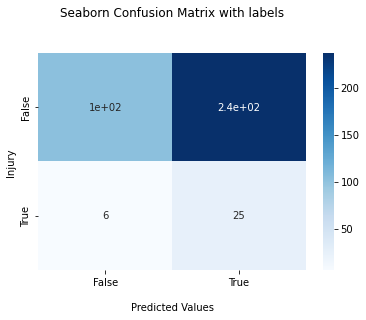

In [19]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Injury ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [21]:
confusion_matrix

Prediction,0,1
Injury,,
0,103,237
1,6,25


In [22]:
print(metrics.classification_report(y, y_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.10      0.81      0.17        31
           0       0.94      0.30      0.46       340

    accuracy                           0.35       371
   macro avg       0.52      0.55      0.31       371
weighted avg       0.87      0.35      0.43       371



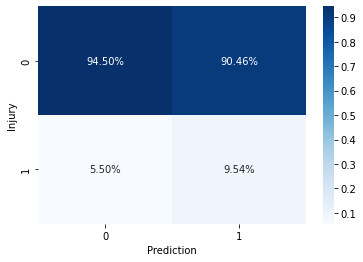

In [23]:
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Model effectiveness based on aggregation *average value*, with aggregation average of rules above 0.65. 

In [25]:
y_pred = data['CALCULATE_AVG_N']
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Injury'], colnames=['Prediction'], margins = False)


In [26]:
#cf_matrix = confusion_matrix(y, y_pred,labels=[1,0])
print(confusion_matrix)

Prediction    0   1
Injury             
0           271  69
1            20  11


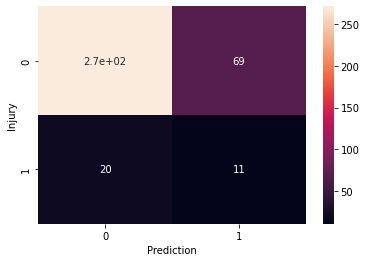

In [27]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [28]:
print(metrics.classification_report(y, y_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.14      0.35      0.20        31
           0       0.93      0.80      0.86       340

    accuracy                           0.76       371
   macro avg       0.53      0.58      0.53       371
weighted avg       0.86      0.76      0.80       371



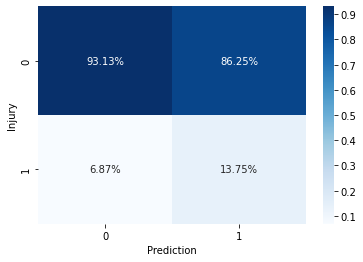

In [29]:
sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')